<a href="https://colab.research.google.com/github/Parvez13/TensorFlow-Developer-Certification/blob/master/10_time_series_forecasting_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting fundamentals with TensorFlow + Milestone Project 3: BitPredict💰📈
 
 Links:
 * All resources : https://github.com/mrdbourke/tensorflow-deep-learning
 

## Get Data

We're going to be using the historical price data of Bitcoin to try and predict the future price of Bitcoing, we downloaded the data from here: https://www.coindesk.com/price/bitcoin.

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2021-10-16 04:18:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2021-10-16 04:18:14 (7.51 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series with pandas

In [2]:
# Import with pandas
import pandas as pd
# Let's read in our Bitcoin data and parse the dates
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=['Date'],
                 index_col=['Date']) # prase the date column and tell phones
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
# How many samples do we have?
len(df)

2787

We've collected the historical price of Bitcoin for the past ~8 years but there's 2787 samples.

Typically deep learning models usually like lots and lots and lots of samples (where lots and lots and lots can thousands to tens of thousands to millions).

A smaller number of samples is something you'll often run into with time series data problems.

> 🔑**Note:** The **seasonality** of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has as seaonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year.

In [6]:
8*365

2920

In [7]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Text(0.5, 1.0, 'Price of Bitcoin from 1 Oct 2013 to 18 May 2021')

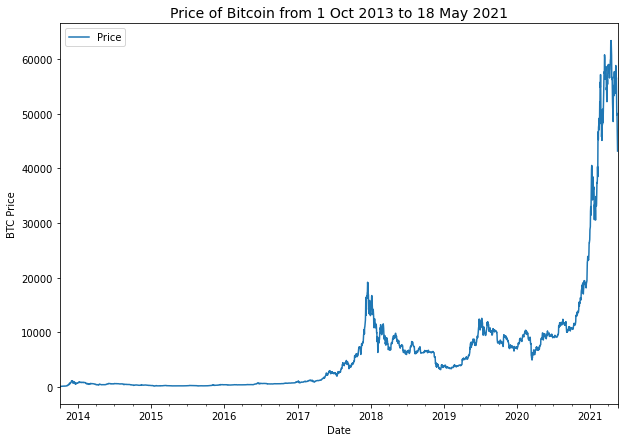

In [8]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=14)

## Importing time series data with Python's CSV module

In [9]:
# Importing and formatting historical Bitcoin With Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=',')
    next(csv_reader) # Skiip first line (this gets rid of the column titles)
    for line in csv_reader:
        #timesteps.append(line[1])
        timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not string)
        btc_price.append(float(line[2])) # Get the closing price as float

 # View first 10 of each
timesteps[:10], btc_price[:10]       

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 1.0, 'Price of Bitcoin from 1 Oct 2013 to 18 May 2021')

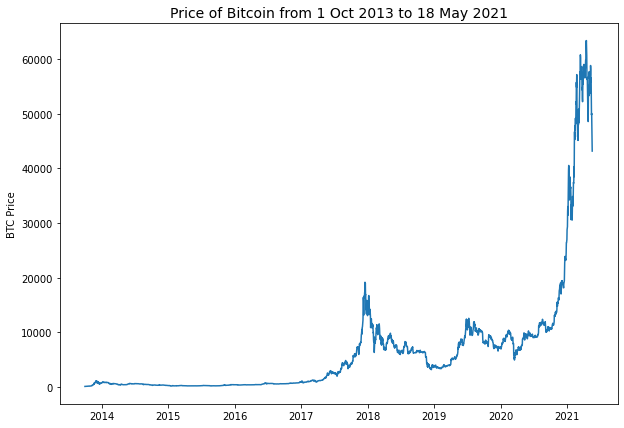

In [10]:
# Plot from csv
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=14)

## Format data prt 1: Create train and test sets of our time series data.


### Creating train and test sets with time series data(the wrnong way)


In [11]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

In [12]:
timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [13]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

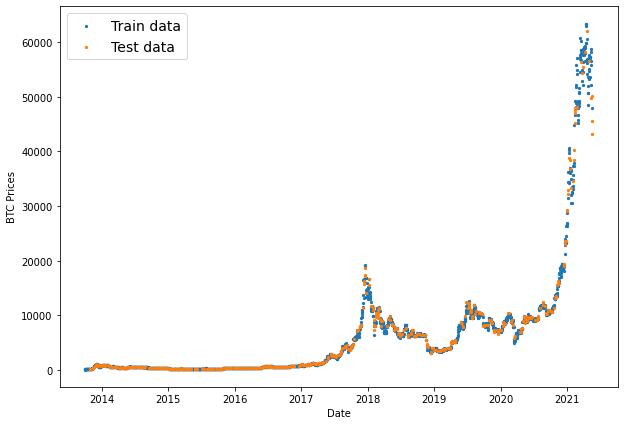

In [14]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel("Date")
plt.ylabel("BTC Prices")
plt.legend(fontsize=14)
plt.show();

## Create train & test sets for time series (the right way)

In [15]:
prices

array([  123.65499   ,   125.455     ,   108.58483   , ...,
       47885.62525472, 45604.61575361, 43144.47129086])

In [16]:
# Create train and test splits the right way for time series data
split_size = int(0.8*len(prices)) # 80% train, 20% test - you can change these values as needed, e.g 90/10, 95/5


# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

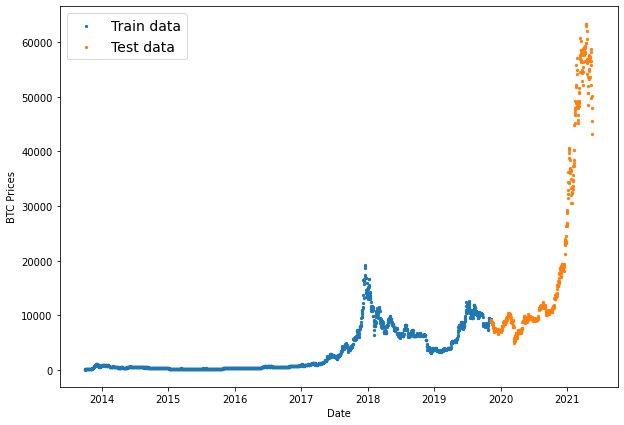

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel("Date")
plt.ylabel("BTC Prices")
plt.legend(fontsize=14)
plt.show();

### Create a plotting function

Typing plotting code is tedious, let's functionize it.

In [18]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
    """
    Plots timesteps (a series of points in time) against values( a series of values across timesteps)
    
    Parameters
    ----------
    timesteps : array of timestep values
    values : array of values across time
    format : style of plot, default "."
    start : where to start the plot (setting a value will index from start of timesteps & values)
    end : where to end the plot (similar to start but for the end)
    label : label to show on plot about values. default None

    """
    # Plot the series
   
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14) # make label bigger
    plt.grid(True)

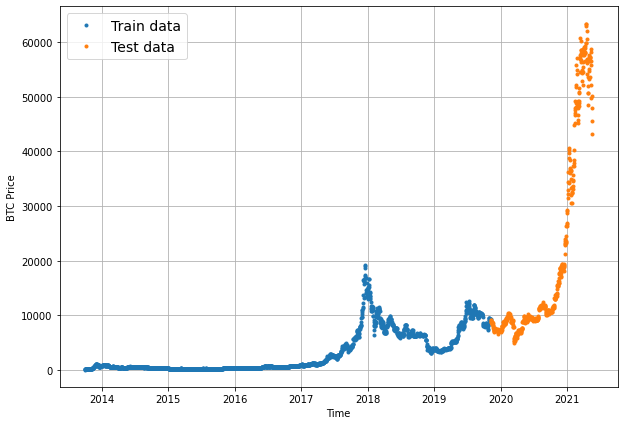

In [19]:
# Test out plotting function
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label='Train data')
plot_time_series(timesteps=X_test, values=y_test, label='Test data')

## Modelling Experiments

We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Terms to be familiar with:
* **Horizon**= number of timesteps into the future we're going to predict
* **Window size** = number of timesteps we're going to use to predict **horizon**


## Model 0 : Naive forecast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

In English:
> The prediction of timestep t(y-hat) is equal to the value at timestep t-1 (previous timestep)-this is for a horizon of 1.

In [20]:
# Create a naive forecast
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [21]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

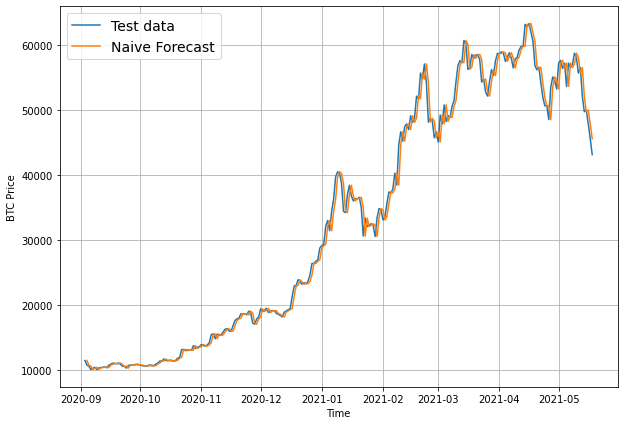

In [22]:
# Plot naive forecast
plt.figure(figsize=(10,7))
# plot_time_series(timesteps=X_train, values=y_train, label='Train data')
plot_time_series(timesteps=X_test, values=y_test,start=300,format='-', label='Test data')
plot_time_series(timesteps=X_test[1:], values=naive_forecast,start=300, format="-", label='Naive Forecast')

> ⛏ **Exercise:** Spend 10 minutes reading the simple forecasts chapter of Forecasting: Principles in Practice. And have a search to find out why the naive forecast is hard to beat, does the term autoregressive comes up?

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):
* MAE - mean absolute error
* MSE - mean squared error

For all of the above metrics, **lower is better**, for example, an MAE of 0 that is better than an MAE of 100.

The main thing we're evaluating here is: **how do our model's forecasts (y_pred) compare against the actual values(y_true or ground truth values)?**

In [23]:
import tensorflow as tf

In [24]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
    """

    Implement MASE(assuming no seasonality of data).

    """
    mae= tf.reduce_mean(tf.abs(y_true-y_pred))
    

    # Find MAE of naive forecast(no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)
    
    return mae/mae_naive_no_season

In [25]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [26]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
   # Make sure float32 datatype (for metric calculations)
   y_true = tf.cast(y_true, dtype=tf.float32)
   y_pred = tf.cast(y_pred, dtype=tf.float32)


   mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
   mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
   rmse = tf.sqrt(mse)
   mape  = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
   mase = mean_absolute_scaled_error(y_true, y_pred)
  
   return {"mae":mae.numpy(),
           "mse": mse.numpy(),
           "rmse":rmse.numpy(),
           "mape":mape.numpy(),
           "mase": mase.numpy()}

In [27]:
naive_results = evaluate_preds(y_test[1:], naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [28]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [29]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737226>

In [30]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

## Other models you can use for baselines and for actual forecasts

In this notebook, we're focused on TensorFlow and deep learning models.

However there are plenty of other styles of time series forecasting models you may want to experiment with:https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting:models-which-can-be-used-for-baselines-and-actual-forecast

## Format Data Part 2: Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into a supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] - [7]
[1, 2, 3, 4, 5, 6, 7] - [8]
[2, ,3, 4, 5, 6, 7, 8] - [9]
```


In [31]:
len(y_train)

2229

In [32]:
# What we want to do with our BitCoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")


We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [33]:
# Let's setup global variables for window and horizon size
HORIZON =1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction


In [34]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
    """
    Creates labels for windowed dataset.

    E.g. if horizon=1
    Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Ouput: ([0, 1, 2, 3, 4, 5, 6], [7]) 
    """
    return x[:, :-horizon], x[:, -horizon:]

In [35]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label:{tf.squeeze(test_label).numpy()}") 
      

Window: [0 1 2 3 4 5 6] -> Label:7


We've got a way to label our windowed data.

However, this only works on a small scale.

We need a way to do the above across our entire time series.

We could do this with Python for loops, however, for large time series, that'd be quite slow.

To speed things up, we'll leverage NumPy's array indexing
-https://numpy.org/doc/stable/reference/arrays.indexing.html

Our function will:
1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use Numpy indexing to create a 2D array of multiple window steps, for example:

```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
```
3. Uses the 2D array of multiple window steps (from 2.) to index on a target series (e.g. the historical price of Bitcoin)
4. Uses our `get_labelled_windows()` function we created above to turn the window steps into windows with a specified horizon.

> 📝**Resource:** The function we're about to create has been adapted from the following article: https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5




In [36]:
import numpy as np

# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.

  """

  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step  = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # Create 2D array of window_size 
  
  # 3. Index on target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
 # print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

  



In [37]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [38]:
# view the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [39]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window : {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window : [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window : [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window : [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


> 🔑 **Note:** There's a function which does similar to the above in tf.keras.preprocessing, an extension could be to try and replicate what we've done using the premade function: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/timeseries_dataset_from_array.

## Turning windows into training and test sets

In [40]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.

  """
  split_size = int(len(windows)*(1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels
  


In [41]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [42]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [43]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [44]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [45]:
np.squeeze(train_labels[:5]).shape

(5,)

## Make a modelling checkpoint callback

Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performances against the other model's best performances.

For example if our model performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [46]:
import os


# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path='model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor='val_loss',
                                            verbose=0, # only output a limited amount of test
                                            save_best_only=True)


## Model 1: Dense model (window = 7, horizon=1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and ReLU.
* An output layer with linear activation (no activation).
* Adam optimization and MAE loss function.
* Batch size of 128 (previsously we've used 32)
* 100 epochs
* *Hyperparameters* = values a machine learning practitioner can adjust themselves.
* *Parameters** = Values a model learns on its own.

In [47]:
train_windows.shape, train_labels.shape, test_windows.shape, test_labels.shape

((2224, 7), (2224, 1), (556, 7), (556, 1))

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
      layers.Dense(128, activation='relu'),
      layers.Dense(HORIZON, activation='linear')# linear activation is the same as having no activation    
], name='model_1_dense') # name our model so we can save it

# 2. Compile
model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])


Epoch 1/100
18/18 [==============================] - 3s 17ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6526 - val_mae: 2279.6526 - val_mse: 12772728.0000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9991 - val_mae: 1005.9991 - val_mse: 3441833.5000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.5625 - val_loss: 923.2862 - val_mae: 923.2862 - val_mse: 2868220.5000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5625 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.2500
INFO:tensorflow:Assets written to: model_ex

In [ ]:
naive_results

In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

In [ ]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

## Making forecasts with a model (on the test dataset)

To make "forecasts" on the test dataset (note: these won't br actual forecasts, they're only psuedo forecasts because actual forecasts are into the future), let's write a function to:

1. Take in a train model.
2. Takes in some input data(same kind of data the model was trained on)
3. Passes the input data to the model's `predict()` method
4. Returns the predictions

In [ ]:
def make_preds(model, input_data):

  """

  Uses model to make predictions input_data.
  """
  forecast = model.predict(input_data)
  return  tf.squeeze(forecast) # return 1D array of predictions



In [ ]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred= model_1_preds)
model_1_results

In [ ]:
naive_results

In [ ]:
# Let's plot our model 1 predictions
offset = 450
plt.figure(figsize=(10,7))
# Account for the test window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:,0], 
                 start=offset, 
                 label='Test Data')

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label='model_1_preds')

## Model 2: Dense(window = 30, horizon=1)

**Challenge**: Build Model 2 using same architecture as model_1 and set window size = 30 and horizon = 1

In [ ]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # use 30 timesteps in past

In [ ]:
# Make window data with appropriate horizon and window sizes
full_windows_30, full_labels = make_windows(prices,
                                            window_size=WINDOW_SIZE,
                                            horizon=HORIZON)
len(full_windows_30), len(full_labels)

In [ ]:
print(full_windows_30[0])
print(full_windows_30[1])
(len(full_windows_30[0]))

In [ ]:
for i in range(3):
  print(f"Window: {full_windows_30[i]} -> Label : {full_labels[i]}")

In [ ]:
# Make train and testing windows
train_windows_30, test_windows_30, train_labels_30, test_labels_30= make_train_test_splits(full_windows_30, full_labels)
len(train_windows_30), len(test_windows_30), len(train_labels_30), len(test_labels_30)

In [ ]:
train_windows_30[:2], train_labels_30[:2]

In [ ]:
train_labels.shape, train_labels_30.shape

In [ ]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear')
], name='model_2_dense')

# compile model
model_2.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# fit model
model_2.fit(x=train_windows_30,
            y=train_labels_30,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows_30, test_labels_30),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [ ]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows_30, test_labels_30)

In [ ]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows_30, test_labels_30)

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                          test_windows_30)
model_2_preds[:10]

In [ ]:
# Evaluate reuslts for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels_30),
                                 y_pred =model_2_preds)

In [ ]:
model_2_results

In [ ]:
model_1_results

In [ ]:
naive_results

In [ ]:
offset=500
plt.figure(figsize=(10,7))
# Account for test_windows offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test_data")

# plot_time_series(timesteps=X_test[-len(test_windows):], 
#                  values=model_1_preds, 
#                  start=offset, 
#                  format="-", 
#                  label="model_1_preds")

plot_time_series(timesteps=X_test[-len(test_windows_30):], 
                 values=model_2_preds, 
                 start=offset, 
                 format="-", 
                 label="model_2_preds")

## Model 3 : Dense With (HORIZON = 7, WINDOW_SIZE=30)

In [ ]:
HORIZON = 7 # We have to predict next 7 days of Bitcoin price
WINDOW_SIZE = 30 # Using past month(30 days) data

In [ ]:
# Make full window and full labels
full_window, full_labels = make_windows(prices, 
                                        window_size=WINDOW_SIZE,
                                        horizon=HORIZON)

In [ ]:
len(full_window), len(full_labels)

In [ ]:
print(full_window[:2])
print(len(full_window[0]))

In [ ]:
print(full_labels[:2])
print(len(full_labels[0]))

In [ ]:
# Make train and test datasets using full window and full labels
train_window, test_window, train_label, test_label = make_train_test_splits(full_window,
                                                                            full_labels)

In [ ]:
# Check the lengths
len(train_window), len(test_window), len(train_label), len(test_label)

In [ ]:
# Check sample
for i in range(2):
  print(f"Window : {train_window[i]} -> Label {train_label[i]}")
  print()
  print(f"Window Shape {train_window[i].shape} Label Shape : {train_label[i].shape}")

In [ ]:
tf.random.set_seed(42)

# Build model 3
model_3 = tf.keras.Sequential([
      layers.Dense(128, activation='relu'),
      layers.Dense(HORIZON)
], name='model_3_dense')

# Compile the model
model_3.compile(loss='MAE',
                optimizer='adam')

# Fit model
model_3.fit(x=train_window,
            y=train_label,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_window, test_label),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
# Evaluate model 3 preds
model_3.evaluate(test_window, test_label)

In [ ]:
# Load in best performing model
model_3 = tf.keras.models.load_model('model_experiments/model_3_dense/')
model_3.evaluate(test_window, test_label)

In [ ]:
# Get forecat predictions
model_3_preds = make_preds(model_3,
                           test_window)
model_3_preds[:2]

In [ ]:
# Evaluate results for model 3 predictions
model_3_results = evaluate_preds(y_true=tf.squeeze(test_label),
                                 y_pred=model_3_preds)
model_3_results

## Make our evaluation function work for larger horizons

In [ ]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
   # Make sure float32 datatype (for metric calculations)
   y_true = tf.cast(y_true, dtype=tf.float32)
   y_pred = tf.cast(y_pred, dtype=tf.float32)


   mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
   mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
   rmse = tf.sqrt(mse)
   mape  = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
   mase = mean_absolute_scaled_error(y_true, y_pred)

   # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
   if mae.ndim > 0:
     mae = tf.reduce_mean(mae)
     mse = tf.reduce_mean(mse)
     rmse = tf.reduce_mean(rmse)
     mape = tf.reduce_mean(mape)
     mase = tf.reduce_mean(mase)
  
   return {"mae":mae.numpy(),
           "mse": mse.numpy(),
           "rmse":rmse.numpy(),
           "mape":mape.numpy(),
           "mase": mase.numpy()}

In [ ]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_label),
                                 y_pred=model_3_preds)
model_3_results

We've made and evaluate predictions with `model_3`

In [ ]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset,format='-' ,label='Test data')
plot_time_series(timesteps=X_test[-len(test_window):], values=model_3_preds[:,0], start=offset, format='-',label='model_3_preds')

In [ ]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:,0], 
                 start=offset,
                 label='Test data')
plot_time_series(timesteps=X_test[-len(test_window):], 
                 values=tf.reduce_mean(model_3_preds,axis=1),
                 start=offset, 
                 format='-',
                 label='model_3_preds')

## Which of our models is performing the best so far?

So we've trained a few models, now let's compare them and see how they've gone..

In [ ]:
pd.DataFrame({'naive':naive_results['mae'],
              'horizon_1_winodw_7':model_1_results['mae'],
              'horizon_1_window_7':model_2_results['mae'],
              'horizon_7_window_30':model_3_results['mae']}, index=['mae']).plot(figsize=(10,7),kind='bar' )

🔑 **Note:**  You might be wondering, why are the naïve results so good? One of the reasons could be due the presence of **autocorrelation** in the data. If a time series has **autocorrelation** it means the value at `t+1` (the next timestep) is typically close to the value at t (the current timestep). In other words, today's value is probably pretty close to yesterday's value. Of course, this isn't always the case but when it is, a naïve model will often get fairly good results.

📖 **Resource:** For more on how autocorrelation influences a model's predictions, see the article [How (not) to use Machine Learning for the time series forecasting: Avoiding the pirfalls by Vegard Flovik](https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424?gi=74f09706c0e9)

## Model 4: Conv1D

In [ ]:
HORIZON = 1 # Predict next day of Bitcoin prices
WINDOW_SIZE = 7 # Use previous week worth data

In [ ]:
# Create windowed data
full_windows, full_labels = make_windows(prices,
                                         window_size=WINDOW_SIZE,
                                         horizon=HORIZON)
len(full_windows), len(full_labels)

In [ ]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

To use the Conv1D layer, we need an input shape of: `(batch_size, timesteps, input_dim)`..
However our data isn't in that shape yet...

In [ ]:
# Check data input shape
train_windows[0].shape # returns (WINDOW_SIZE,)

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in oreder to make sure it works
x = tf.constant(train_windows[0])
x

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [ ]:
# Test out our lambda layer
print(f"Original shape : {x.shape}") # Window_size
print(f"Expanded shape : {expand_dims_layer(x).shape}") 
print(f"Original Values with expanded shape: \n {expand_dims_layer(x)}")

In [ ]:
tf.random.set_seed(42)
# Create Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x,axis=1)),
    layers.Conv1D(filters=128, kernel_size=5,strides=1, padding='causal', activation='relu'),
    layers.Dense(HORIZON)
], name = 'model_4_conv1d')

# Compile the model
model_4.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# Fit 
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [ ]:
model_4.summary()

In [ ]:
# Evaluate model...
model_4.evaluate(test_windows, test_labels)

In [ ]:
# Load back in best performing Conv1D
model_4=tf.keras.models.load_model("model_experiments/model_4_conv1d")
model_4.evaluate(test_windows, test_labels)

In [ ]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

In [ ]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

## Model 5: RNN (LSTM)

Let's build an RNN model for our time series data.

We'll use the same data we created previously.

In [ ]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs  = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation='relu')(x)
#x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=outputs, name='model_5_LSTM')


# Compile 
model_5.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [ ]:
# Load in the best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

In [ ]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

In [ ]:
# Evaluate model 5 prediction
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

🔑**Note:** Because neural networks are such powerful algorithms, they can be used for almost any problem, however, that doesn't mean they'll achieve performant or usable results. You're probably starting to clue onto this now.


In [ ]:
naive_results

## Make a multivariate time series dataset

Before we add a feature to our time series, what is a feature we can use?

One feature we could add is whether or not a person tweeted on that data...

* day 1 - 0
* day 2 - 1
* day 3 - 0


What's a better feature to use?

How about the bitcoin halving events?
https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving.


In [ ]:
# Let's make a multivariate time series
bitcoin_prices.head()

In [ ]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset (our data starts from 01 Oct 2013)
block_reward_2 = 25 # 8 January 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64('2020-11-28')
block_reward_3_datetime  = np.datetime64('2016-07-09')
block_reward_4_datetime = np.datetime64('2020-05-18')

In [ ]:
# Create data ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

In [ ]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None

# Add in block reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
bitcoin_prices_block.tail()

In [ ]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price', 'block_reward']]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10,7));

## Making a windowed dataset with pandas

Previously, we've turned our univariate time series into windowed dataset using the helper functions above.

However, since we've got multivariate data, these functions won't work.

Not to worry, we can use the pandas.DataFrame.shift() method to window our multivariate data.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

In [ ]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): #shift values for each step in WINDOW_SIZE
    bitcoin_prices_windowed[f'Price+{i+1}'] = bitcoin_prices_windowed['Price'].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

What we've done is created a way to window our dataset directly from a pandas dataframe.

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7,block_reward] -> [8]
[2, 3, 4, 5, 6,7,8, block_reward] -> [8]

```

In [ ]:
# Create X (windows) and y (horizons ) features
X = bitcoin_prices_windowed.dropna().drop('Price', axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)
X.head()

In [ ]:
y.head()

In [ ]:
# Make train and test sets using indexing
split_size = int(len(X)*0.8)
X_train , y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

## Model 6: Dense(multivariate time series)

In [ ]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
        layers.Dense(128, activation='relu'),
        #layers.Dense(128, activation='relu'),
        layers.Dense(HORIZON)
], name = 'model_6_dense_multivariate')

# Compile
model_6.compile(loss='mae',
                optimizer='adam')

# Fit the model
model_6.fit(X_train, 
            y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test,y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [ ]:
# Evaluate multivariate model
model_6.evaluate(X_test,y_test)

In [ ]:
# Load in and evaluate best performing model
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test,y_test)

In [ ]:
# Make predictions with multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

In [ ]:
# Evaluate predictions to get eval metrics
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

For a challenge on different ways to potentially improve the multivariate time series model, see the reference here:
https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#model-6-dense-multivariate-time-series

## Model 7: N-BEATS algorithm

Let's now try build the biggest baddest (though maybe not the baddest, as in, it perform really well..) time series forecasting model we've built so far.

More specifically, we're going to be replication the algorithm in Figure 1 from the following paper: https://arxiv.org/pdf/1905.10437.pdf

Why?

* This will allow us to practice replicating a paper with TensorFlow code.
* We will see how to use TensorFlow layer subclassing (to make our own custom layers).
* Get experience using the Functional API to create a custom architecture.

### Building and testing the N-BEATS block layer

Because the N-BEATS block layer doesn't exist in TensorFlow, We've got to create it. 

To create custom layers and models in TensorFlow we can use subclassing.
https://www.tensorflow.org/guide/keras/custom_layers_and_models

In [ ]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all the arguments for the parent class(input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation='linear')
    

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and teh forecast from theta
    backcast, forecast = theta[:,:self.input_size], theta[:,-self.horizon]
    return backcast, forecast


Let's test our NBeatsBlock class.

To do we'll make some dummy inputs and outputs

In [ ]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)


In [ ]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0)
dummy_inputs

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast : {tf.squeeze(backcast.numpy())}")
print(f"Forecast : {tf.squeeze(forecast.numpy())}")

### Preparing  data for the N-BEATS algorithm using tf.data

To make our input data load as fast as possible we're going to be adhering to the performant data pipeline steps in the tf.data guide:
https://www.tensorflow.org/guide/data_performance

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7


In [ ]:
# Create N-BETS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

In [ ]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"]=bitcoin_prices_nbeats["Price"].shift(periods=i+1)

bitcoin_prices_nbeats.head()

In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()['Price']

# Make train and test sets
split_size = int(len(X)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

In [ ]:
# Time to make our dataset performance using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

### Setting up hyperparameters for N-BEATS algorithm

The N-BEATS alogrithm has a fair few number of parameters, many of them can be found in Table 18(in paper)

In [ ]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS  = 30 


INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE =INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

### Getting ready for residual connections

Before we can craft our N-BEATS model, we need two layers for the residual connections (subtract and add).

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture (section 3.2 of N-BEATS paper).

For more on residual connections see: https://en.wikipedia.org/wiki/Residual_neural_network

And here: https://paperswithcode.com/method/resnet.

In [ ]:
# Make tensors
tensor_1 =tf.range(10)+10
tensor_2 =tf.range(10)

# Substract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added =layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

### Building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` (this'll be the initial block used for the network, the reet will be created as par of stack.)
2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API).
3. Make the initial backcast and forecast for the model with the layer created in (1).
4. Use for loop to create stacks of block layers.
5. Use the `NBeatsBlock` class within the for loop in (4) to create blocks which return backcasts and block-level forecasts 
6. Create the double residual stacking using subtract and add layers.
7. Put the model inputs and outputs together using `tf.keras.Model()`.
8. Compile the model with MAE loss(the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default setting as per section 5.2(N-BEATS paper).
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
   * Early Stopping - because the model will be training for so long, we'll stop it early if it stops improving.
   * Reduce LR on Plateau - if a model stops improving, try lowering the learning to reduce the amount it updates its weights each time (take smaller steps towards best performance).
   


In [ ]:
INPUT_SIZE, THETA_SIZE, HORIZON, N_NEURONS, N_LAYERS

In [ ]:

tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE),name='stack_input')

# 3. Create initial backcast and forecast input(backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i,_ in enumerate(range(N_STACKS-1)): # first stack is created in #3

  # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast:
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons= N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
    
  )(residuals) # Pass in the residual

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name='model_7_N-BEATS')

# 8. Compile model with MAE loss
model_7.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                )

# 9. Fit the model with Early Stopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                            patience=100,
                                                            verbose=1)])

In [ ]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

In [ ]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

In [ ]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

In [ ]:
model_1_results

In [ ]:
naive_results

Woah..even with all of those special layers and hand-crafted network, it looks like the N-BEATS model doesn't perform as well as `model_1` or the original naive forecast.

This goes to show the power of smaller networks as well as the fact not all larger models are better suited for a certain type of data.

### Plotting the N-BEATS architecture we've created

In [ ]:
# Plot the N-BEATS model and inputs the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble (stacking different models together)

An ensemble leverages the wisdom of the crowd effect.

It combines many *different* models to predict a common goal.


In [ ]:
HORIZON, WINDOW_SIZE

### Constructing and fitting and ensemble of models (using different loss function)


In [ ]:
def get_ensemble_models(horizon=HORIZON, 
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, 
                        num_epochs=100, 
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)                                 
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [ ]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=100)

### Make predictions with our ensemble model

In [ ]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

In [ ]:
ensemble_preds

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds,axis=0)
ensemble_mean

In [ ]:
ensemble_median = np.median(ensemble_preds,axis=0)
ensemble_median

Our ensemble preds come out in multiple dimension but to combine into **point predictions** we can leverage the mean of all of the predictions or the  median-https://machinelearningmastery.com/combine-predictions-for-ensemble-learning/

In [ ]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_preds)
ensemble_results

In [ ]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

In [ ]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

So far we've been making point predictions with our models.

E.g horizon=1,our model predictions tomorrow's price of Bitcoin will be $50,000USD

Wouldn't it be helpful if we knew a range of where that prediction came from?

Instead of 50,000 USD on the dot, how about 48,000 to 52,000 USD?

One way to get the 95% confidence prediction intervals for a deep learning model is the bootstrap method:
1. Take the predictions from a number of randomly initialzed models (we've got this thanks to our enemble models).
2. Measure the standard deviation of the predictions.
3. Multiply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal, 95% of observations fall within 1.96 standard deviations of the mean)
4. To the get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1).

* https://eng.uber.com/neural-networks-uncertainty-estimation/



In [ ]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions from a number of randomly intialized model.
    
  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds,axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std
  
  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds,axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper






In [ ]:
# Get the upper and lower bounds of the 95% percent interval
lower, upper = get_upper_lower(preds=ensemble_preds)
lower, upper

📚**Resource:** Many of the steps we've taken above have inspired/referenced from the Machine Learning Mastery blog post on 
[Prediction Intervals for Deep Learning Neural Networks](https://machinelearningmastery.com/prediction-intervals-for-deep-learning-neural-networks/)

In [ ]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds,axis=0)

# Plot the median of our ensemble preds along with the prediction intervals(where the predictions fall between )
offset=500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:],y_test[offset:],"g",label='Test Data')
plt.plot(X_test.index[offset:],ensemble_median[offset:],"k-",label='Ensemble Median')
plt.xlabel("Date")
plt.ylabel("BTC Price")
# To plot the upper and lower bounds
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label='Prediction Intervals')
plt.legend(loc='upper left', fontsize=14);

So far all of our models predictions have been lagging behind the test data...

As is they're replicating what the naive model does and just predict the previous timsteps as the next timsteps

> 🔑 **Note:** These prediction intervals are estimates themselves. And they have been created with the assumption that our model's data is from a nomal distribution.

## Aside: Two types of uncertainty (coconut and subway)

Uncertainty estimates in machine learning seek out to qualitatively and quantitatively answer the questions:
1. What can my model know? (with perfect data, what's possible for a model to learn?)
2. What doesn't my model know? (what can a model never predict? Or would it helpful if a model could tell you that when it's making a prediction, it dosn't actually know if 
it's right or not?)

There are two major types of uncertainty in machine learning you should know about:
* **Aleatoric uncertainty** - this type of uncertainty cannot be reduced and it is often referred as "data" uncertainty or "subway" uncertainty.
* **Epistemic uncertainty** - this type of uncertainty can be reduced, it also referred to as "model" o r "coconut" uncertainty 


## Model 9: Train a model on the full historical data to make predictions into the future.

So far all of our models have predicted on the test dataset, however, this is only a pseudofuture

Let's now build a model which is capable of predicting into the future!

In [ ]:
bitcoin_prices_windowed.head()

In [ ]:
 bitcoin_prices_windowed.tail()

In [ ]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(['Price', 'block_reward'],axis=1).to_numpy()
# Get labels
y_all = bitcoin_prices_windowed.dropna()['Price'].to_numpy()

len(X_all), len(y_all)

In [ ]:
X_all[:5], y_all[:5]

In [ ]:
# Turn data into efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all,labels_dataset_all))

# Batch and  prefetch for optimial performance
BATCH_SIZE=1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
dataset_all

In [ ]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
        layers.Dense(128,kernel_initializer='he_normal', activation='relu'),
        layers.Dense(128, kernel_initializer='he_normal',activation='relu'),
        layers.Dense(HORIZON)
],name='model_9_future_model')

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on alll of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

## Make predictions into future

In [ ]:
# How many timesteps to predict into the future?
INTO_FUTURE=14

To make predictions into the future we want a function which:

1. Takes as input:
  * a list of values (Bitcoin historical data)
  * a trained model (such as `model_9`)
  * a window into the future to predict (our `INTO_FUTURE` variable)
  * the window size a model was trained on (`WINDOW_SIZE`)-the model can only predict on the same kiind of data it was trained on
2. Creates an empty list for future forecasts (this will be returned at the end of the end, when it's full of predictions) and extracts the last `WINDOW_SIZE` values from the input values
3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction

In [ ]:
# 1. Create function to make predictions into the future
def make_future_forecasts(values,model,into_future,window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after values ends.

  Returns future forecasts as a list of floats.
  """

  # 2. Create an empty list for future foreasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time.
  for _ in range(INTO_FUTURE):
    # Predict on the last window then append it again, again, again (our model will eventually start to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window,axis=0))
    print(f"Prediction on : \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds(model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast


> 🛠 **Exercise:** In terms of a forecasting model, what might another approach to our `make_future_forecasts()` function? Recall, that for making forecasts, you need to retrain a model each time you want to generate a new prediction.

> So perhaps you could try to: make a prediction (one timestep into the future), retrain a model with this new prediction appended to the data, make a prediction, append the prediction, retrain a model... etc.

> As it is, the make_future_forecasts() function skips the retraining of a model part

In [ ]:
# Make forecasts into the future
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

In [ ]:
bitcoin_prices_windowed

## Plot future forecasts

In [ ]:
len(future_forecast)

In [ ]:
future_forecast

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future,"D") # specify end date
  return np.arange(start_date, end_date,dtype='datetime64[D]') # return a date range between start and end date
  

In [ ]:
# Last timestep of timesteps (currently np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

In [ ]:
# Get next two week of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

In [ ]:
# Insert last timestep/final price into next time step and future forecasts so the plot doesn't look janky
next_time_steps = np.insert(next_time_steps,0,last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

In [ ]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500,format='-',label='Actual BTC Price')
plot_time_series(next_time_steps, future_forecast, format='-',label='Predicted')

## Model 10: Why forecasting in BS(the turkey problem)

In [ ]:
# Let's introduce a turkey problem to our BTC data (price of BTC falls 100x in our day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1]/100

In [ ]:
# Manufacture an extra price on the end (to showcase our Turkey problem)
btc_price_turkey[-10:]

In [ ]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index) 
btc_timesteps_turkey[-10:]

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label='BTC Price + Turkey problem',
                 start=2500)

In [ ]:
HORIZON=1
WINDOW_SIZE=7

In [ ]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey),window_size=WINDOW_SIZE,horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows,full_labels)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

## Build a turkey model (model to predict on turkey data)

In [ ]:
tf.random.set_seed(42)

# Clone model 1 architecture for turkey modl and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"

# Compile the model
turkey_model.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

# fit
turkey_model.fit(X_train,
             y_train,
             epochs=100,
             verbose=0,
             batch_size=128,
             validation_data=(X_test,y_test),
             callbacks=[create_model_checkpoint(turkey_model.name)])

In [ ]:
# Evaluate model on test data
turkey_model.evaluate(X_test,y_test)

In [ ]:
# Load best performing turkey model and evaluate on test data
turkey_model = tf.keras.models.load_model('model_experiments/model_10_turkey_model')
turkey_model.evaluate(X_test,y_test)

In [ ]:
# Make prediction with turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

In [ ]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

In [ ]:
plt.figure(figsize=(10,7))
offset=0
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label='Turkey Test Data',
                 start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label='Turkey Preds',
                 start=offset);

## Compare models

In [ ]:
# Compare different model results (w=window,h=horizon, e.g w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model":naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                               "model_2_dense_w30_h1": model_2_results,
                               "model_3_dense_230_h7":model_3_results,
                               "model_4_Conv1D": model_4_results,
                               "model_5_LSTM": model_5_results,
                               "model_6_multivariate":model_6_results,
                               "model_7_NBEATS":model_7_results,
                               "model_8_ensemble":ensemble_results,
                               "model_10_turkey": turkey_results}).T
model_results

In [ ]:
# Sort  model resutls by MAE and plot them
model_results[['mae']].sort_values(by='mae').plot(figsize=(10,7),kind='bar');

## Exercises

1. Does scaling the data help for univariate/multivariate data(e.g. getting all of the value between 0&1)
  * Try doing this for a univariate model(e.g. `model_1`) and a multivariate model(e.g.`model_6`) and see if it effects model training or evaluation results

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(np.expand_dims(prices,axis=1))
scaled_x = scaler.transform(np.expand_dims(prices, axis=1))
scaled_x = np.squeeze(scaled_x)
scaled_x

In [ ]:
WINDOW_SIZE = 7
HORIZON = 1

full_window, full_labels = make_windows(scaled_x,
                                        WINDOW_SIZE,
                                        HORIZON)

In [ ]:
for i in range(5):
  print(f"Full Window: {full_window[i]} -> Full Label : {full_labels[i]}")

In [ ]:
# make train test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

In [ ]:
# Build as same as model

# Set random seed
tf.random.set_seed(42)

# Clone model 1
model = tf.keras.models.clone_model(model_1)

# Compile the model
model.compile(loss='mae',
              optimizer='adam',
              metrics=['mae'])

# Fit
model.fit(train_windows,
          train_labels,
          epochs=100,
          verbose=0,
          batch_size=128,
          validation_data=(test_windows,test_labels))

In [ ]:
# Evaluate
model.evaluate(test_windows, test_labels)

In [ ]:
# Making prediction
model_preds = model.predict(test_windows)
model_preds[:10]

In [ ]:
# model_6 multivariate
# Block reward values
block_reward_1 = 50 # 3 January 2009 
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None
bitcoin_prices_block

In [ ]:
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

In [ ]:
# Make a copy of the bitcoin historical data
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): 
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

In [ ]:
# Let's create X & y, remove the NaN's and convert to float 32 to prevent Tensorflow error
X = bitcoin_prices_windowed.dropna().drop("Price",axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)
X.head()

In [ ]:
# Scaling the X data
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(np.expand_dims(y,axis=1))
y_scaled = np.squeeze(y_scaled)

In [ ]:

# Make train and test set splits of the scaled data 
split_size = int(len(X) * 0.8)
X_train, y_train = X_scaled[:split_size], y_scaled[:split_size]
X_test, y_test = X_scaled[split_size:], y_scaled[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

In [ ]:
# Clone model
model_6 = tf.keras.models.clone_model(model_6)

# compile
model_6.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# fit
model_6.fit(X_train,
            y_train,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(X_test,y_test))

In [ ]:
model_6.evaluate(X_test,y_test)

In [ ]:
# Preds
model_6_preds= tf.squeeze(model_6.predict(X_test))
model_6_preds

2. Get the most up to date data on Bitcoin, train a model & see how it goes (our data goes up to May 18 2021)

* You cn dowload the Bitcoin historical data for free fromhttps://www.coindesk.com/price/bitcoin/ and  clicking "Export Data" -> "CSV"

In [ ]:
from google.colab import files
files.upload()

In [ ]:
btc_df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-09-27-CoinDesk.csv",
                     parse_dates=['Date'],
                     index_col=['Date'])

In [ ]:
btc_df.head()

In [ ]:
btc_df.tail()

In [ ]:
btc_price_updated = pd.DataFrame(btc_df['Closing Price (USD)']).rename(columns={'Closing Price (USD)':'Price'})
btc_price_updated

In [ ]:
WINDOW_SIZE = 7
HORIZON = 1


timesteps = btc_price_updated.index.to_numpy()
prices_updated = btc_price_updated['Price'].to_numpy()

In [ ]:
timesteps[:5], prices_updated[:5]

In [ ]:
full_windows, full_labels = make_windows(prices_updated,
                                         WINDOW_SIZE,
                                         HORIZON)

In [ ]:
# example
for i in range(3):
  print(f"Full_windows : {full_windows[i]} -> Label: {full_labels[i]}")

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,full_labels)
                               


In [ ]:
len(train_windows), len(test_windows),len(train_labels), len(test_labels)

In [ ]:
model_results

In [ ]:
# random seed
tf.random.set_seed(42)

# copy model_1 architecture
model = tf.keras.models.clone_model(model_4)
model._name= "Model_1"

# compile the model
model.compile(loss='mae',
              optimizer='adam')

# fit the model
model.fit(train_windows,
          train_labels,
          epochs=150,
          verbose=0,
          batch_size=128,
          validation_data=(test_windows, test_labels),
          callbacks=[create_model_checkpoint(model._name)])

In [ ]:
# evaluate
model.evaluate(test_windows, test_labels)

In [ ]:
# Evaluate with best trained model
load_model = tf.keras.models.load_model("/content/model_experiments/Model_1")
load_model.evaluate(test_windows, test_labels)

In [ ]:
# make preds
model_preds = make_preds(load_model, test_windows)
model_preds[:10]

In [ ]:
# evaluation_metrics
model_results_updated = evaluate_preds(y_true=test_labels,
                               y_pred=model_preds)
model_results_updated

In [ ]:
INTO_FUTURE = 14

forecast = make_future_forecasts(values=test_windows,
                                 model=model,
                                 into_future=INTO_FUTURE,
                                 window_size=WINDOW_SIZE)
forecast

3. For most of our models we used `WINDOW_SIZE=7`, but is there a better window size?
* Setup a series of experiments to find whether or not there's a better window size.
* For example, you might train 10 different models with `HORIZON=1` but with window sizes ranging from 2-12.

In [ ]:
tf.range(2,12)

In [ ]:
model_results_list = []

from tqdm import tqdm
for size in tqdm(range(2,12)):
  HORIZON = 1 
  WINDOW_SIZE = size

  # Making window and labels 
  full_windows , full_labels = make_windows(prices, window_size= WINDOW_SIZE , horizon= HORIZON)
  

  # Splitting the data in train and test
  train_windows ,  test_windows ,train_labels,  test_labels = make_train_test_splits(full_windows , full_labels)


  # Building a simple dense model
  input = layers.Input(shape = (WINDOW_SIZE ,) , name = 'Input_layer')
  x = layers.Dense(128 , activation= 'relu')(input)
  output = layers.Dense(HORIZON , activation= 'linear')(x)

  # Packing into a model 
  model = tf.keras.Model(input , output , name = f'model_windowed_{size}')

  # Compiling and fitting the model 
  model.compile(loss = 'mae' , optimizer = 'adam' , metrics = 'mae')

  model.fit(train_windows , train_labels , 
            epochs = 100 , verbose = 0 , 
            batch_size = 128 , 
            validation_data = (test_windows , test_labels))
  

  # Making predictions 
  preds_ = model.predict(test_windows)
  y_preds = tf.squeeze(preds_)

  results = evaluate_preds(tf.squeeze(test_labels) , y_preds)
  model_results_list.append(results)


4. Create a windowed dataset just like the ones we used for `model_1` using `tf.keras.preprocessing.timeseries_dataset_from_array()` and retrain `model_1` using the recreated dataset.